In [2]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def softmax(z):
    exp_z = np.exp(z - np.max(z))  # Subtract max for numerical stability
    return exp_z / np.sum(exp_z)

def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

def compute_gradients(X, A1, A2, Y, W2, Z1):
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T)
    dB2 = np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (Z1 > 0)  # Derivative of ReLU
    dW1 = np.dot(dZ1, X.T)
    dB1 = np.sum(dZ1, axis=1, keepdims=True)
    return dW1, dB1, dW2, dB2

def evaluate_model(confusion_matrix):
    TP = confusion_matrix[0, 0]
    FN = confusion_matrix[0, 1]
    FP = confusion_matrix[1, 0]
    TN = confusion_matrix[1, 1]
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    return accuracy, precision, recall

# Fixed Data (Non-Random)
X = np.ones((2500, 1)) * 0.5  # Fixed input values
W1 = np.linspace(-0.01, 0.01, num=2500 * 128).reshape(128, 2500)
b1 = np.zeros((128, 1))
W2 = np.linspace(-0.01, 0.01, num=128).reshape(1, 128)
b2 = np.zeros((1, 1))
Y = np.array([[1]])  # Assume car is present

## Teacher Provided this code in his solution, maybe will be needed (I think is not needed, but maybe baby)
# # Simulated Data
# np.random.seed(42)
# X = np.random.rand(2500, 1)  # Random input
# W1 = np.random.rand(128, 2500) * 0.01
# b1 = np.zeros((128, 1))
# W2 = np.random.rand(1, 128) * 0.01
# b2 = np.zeros((1, 1))
# Y = np.array([[1]])  # Assume car is present

print("Question5")
# Forward propagation
Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
print("Predicted Probability (A2) (rounded):", A2.round(2))

print("\nQuestion6")

# Compute gradients
dW1, dB1, dW2, dB2 = compute_gradients(X, A1, A2, Y, W2, Z1)
print("Gradient dW2 shape:", dW2.shape)
print("Minimum of dW2:", dW2.min().round(2))
print("Maximum of dB2:", dB2.max().round(2))

print("\nQuestion7")

# Confusion Matrix
conf_matrix = np.array([[150, 50], [30, 270]])
accuracy, precision, recall = evaluate_model(conf_matrix)
print(f"Accuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\n")

# Multi-Class Softmax Example
Z_multiclass = np.array([2.1, 1.4, 0.5, -0.2]).reshape(-1, 1)
A_softmax = softmax(Z_multiclass)
print("Softmax Probabilities:", A_softmax.flatten().round(2))

vehicles_type = ["Pedestrian", "Truck", "Motorcycle", "Car"]
for i, v in enumerate(vehicles_type): 
    print(f"Softmax Probabilities of {v}:", A_softmax.flatten().round(2)[i])

Question5
Predicted Probability (A2) (rounded): [[0.94]]

Question6
Gradient dW2 shape: (1, 128)
Minimum of dW2: -0.79
Maximum of dB2: -0.06

Question7
Accuracy: 0.84
Precision: 0.83
Recall: 0.75

Softmax Probabilities: [0.56 0.28 0.11 0.06]
Softmax Probabilities of Pedestrian: 0.56
Softmax Probabilities of Truck: 0.28
Softmax Probabilities of Motorcycle: 0.11
Softmax Probabilities of Car: 0.06


Below information how we understand which `softmax probabilities` belongs to vehicle type:

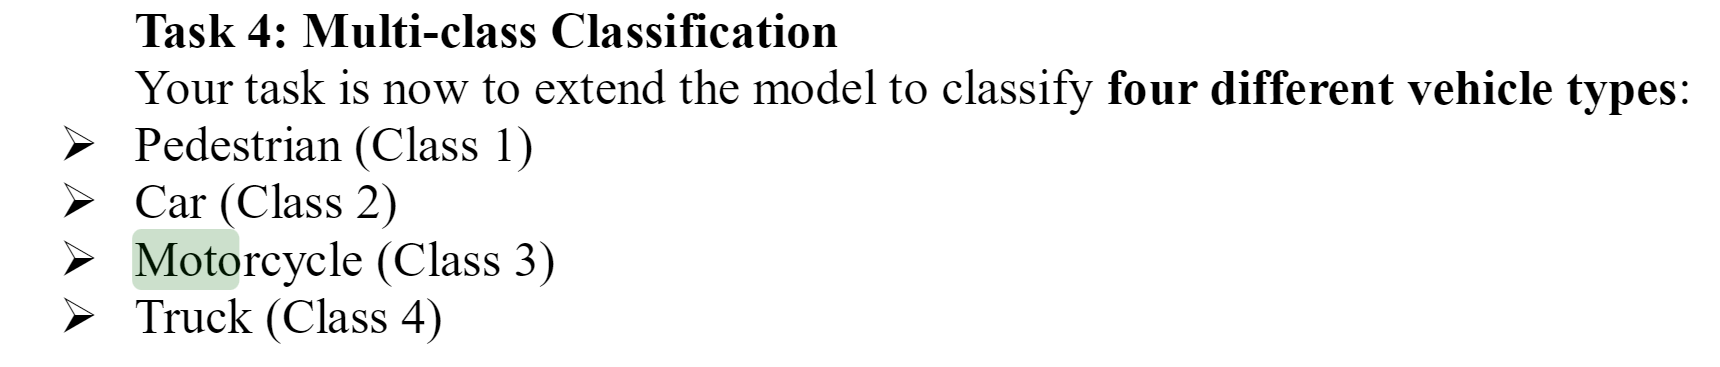